In [289]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [290]:
df = pd.read_csv('mmALL_073119_csv (1).csv')

In [291]:
df.shape

(16363, 31)

In [292]:
df.columns

Index(['id', 'country', 'ccode', 'year', 'region', 'protest', 'protestnumber',
       'startday', 'startmonth', 'startyear', 'endday', 'endmonth', 'endyear',
       'protesterviolence', 'location', 'participants_category',
       'participants', 'protesteridentity', 'protesterdemand1',
       'protesterdemand2', 'protesterdemand3', 'protesterdemand4',
       'stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4',
       'stateresponse5', 'stateresponse6', 'stateresponse7', 'sources',
       'notes'],
      dtype='object')

In [293]:
# Protest is 1 if there was a protest and 0 if not
# Protest number is referring to the the number of protest in current year 

In [ ]:
df.groupby('protestorviolence')

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16363 entries, 0 to 16362
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     16363 non-null  int64  
 1   country                16363 non-null  object 
 2   ccode                  16363 non-null  int64  
 3   year                   16363 non-null  int64  
 4   region                 16363 non-null  object 
 5   protest                16363 non-null  int64  
 6   protestnumber          16363 non-null  int64  
 7   startday               14514 non-null  float64
 8   startmonth             14514 non-null  float64
 9   startyear              14514 non-null  float64
 10  endday                 14514 non-null  float64
 11  endmonth               14514 non-null  float64
 12  endyear                14514 non-null  float64
 13  protesterviolence      15033 non-null  float64
 14  location               14493 non-null  object 
 15  pa

In [295]:
df.groupby(['region', 'country'])['id'].count().sort_index

<bound method Series.sort_index of region           country                 
Africa           Angola                       37
                 Benin                        44
                 Botswana                     50
                 Burkina Faso                 78
                 Burundi                     109
                 Cameroon                     67
                 Cape Verde                   31
                 Central African Republic     68
                 Chad                         38
                 Comoros                      91
                 Congo Brazzaville            51
                 Congo Kinshasa               78
                 Djibouti                     31
                 Equatorial Guinea            30
                 Eritrea                      30
                 Ethiopia                     49
                 Gabon                        47
                 Gambia                       39
                 Ghana                   

In [296]:
df.groupby(['region'])['id'].count().sort_values(ascending = False)

region
Europe             5277
Africa             3630
Asia               3300
South America      1653
MENA               1410
North America       560
Central America     484
Oceania              49
Name: id, dtype: int64

In [297]:
df.groupby(['country'])['id'].count().sort_values(ascending = False)

country
United Kingdom              547
France                      527
Ireland                     434
Germany                     360
Kenya                       350
South Korea                 346
Bangladesh                  339
Venezuela                   315
Greece                      309
China                       265
Thailand                    249
Namibia                     233
Romania                     222
Brazil                      221
Nepal                       211
India                       204
Russia                      192
Pakistan                    174
South Africa                173
Kyrgyzstan                  169
Yemen                       165
Peru                        165
Italy                       164
Nigeria                     159
Spain                       157
Ukraine                     157
Chile                       157
Ecuador                     153
Malaysia                    151
Taiwan                      149
Indonesia                   147


### Europe leads with the most amount of protests 
* political behavior is the leading cause of most protests 

### political behavior is the leading cause of protests globally

### are types common with that of the other regions?
### what is the change over time?




In [298]:
df['protesterdemand1'].value_counts()

political behavior, process    9181
labor wage dispute             1667
price increases, tax policy    1059
removal of politician           950
police brutality                785
land farm issue                 448
social restrictions             413
Name: protesterdemand1, dtype: int64

In [299]:
df['stateresponse1'].value_counts()

ignore             7934
crowd dispersal    3612
arrests            1049
accomodation        937
shootings           415
beatings            300
killings            236
Name: stateresponse1, dtype: int64

In [300]:
pd.crosstab(df['region'], df['protesterdemand1'])

protesterdemand1,labor wage dispute,land farm issue,police brutality,"political behavior, process","price increases, tax policy",removal of politician,social restrictions
region,,,,,,,
Africa,429,104,156,1868,217,215,52
Asia,268,159,259,1736,177,246,139
Central America,50,16,7,262,65,33,1
Europe,591,127,155,3151,380,263,144
MENA,58,13,112,669,76,110,55
North America,26,10,52,351,37,20,4
Oceania,4,1,6,21,0,6,0
South America,241,18,38,1123,107,57,18


In [301]:
pd.crosstab(df['region'], df['stateresponse1'])

stateresponse1,accomodation,arrests,beatings,crowd dispersal,ignore,killings,shootings
region,,,,,,,
Africa,248,217,62,1029,1253,63,164
Asia,213,279,132,681,1499,86,89
Central America,19,14,2,128,259,0,12
Europe,234,255,50,997,3245,6,21
MENA,57,96,43,283,481,41,92
North America,33,70,7,80,288,1,21
Oceania,10,0,0,9,17,0,2
South America,123,118,4,405,892,39,14


In [302]:
df.groupby(['region'])['protesterdemand1'].value_counts(normalize = True)



region           protesterdemand1           
Africa           political behavior, process    0.614272
                 labor wage dispute             0.141072
                 price increases, tax policy    0.071358
                 removal of politician          0.070700
                 police brutality               0.051299
                 land farm issue                0.034199
                 social restrictions            0.017100
Asia             political behavior, process    0.581769
                 labor wage dispute             0.089812
                 police brutality               0.086796
                 removal of politician          0.082440
                 price increases, tax policy    0.059316
                 land farm issue                0.053284
                 social restrictions            0.046582
Central America  political behavior, process    0.603687
                 price increases, tax policy    0.149770
                 labor wage dispute        

In [303]:
df.groupby(['region'])['stateresponse1'].value_counts(normalize = True)

region           stateresponse1 
Africa           ignore             0.412714
                 crowd dispersal    0.338933
                 accomodation       0.081686
                 arrests            0.071476
                 shootings          0.054018
                 killings           0.020751
                 beatings           0.020422
Asia             ignore             0.503189
                 crowd dispersal    0.228600
                 arrests            0.093656
                 accomodation       0.071501
                 beatings           0.044310
                 shootings          0.029876
                 killings           0.028869
Central America  ignore             0.596774
                 crowd dispersal    0.294931
                 accomodation       0.043779
                 arrests            0.032258
                 shootings          0.027650
                 beatings           0.004608
Europe           ignore             0.674917
                 crowd

### in relation to the amount of protests per region, Middle Eastern North Africa has the most killings 

### Europe, North America, and Oceania have the least 

In [304]:
df.groupby(['protesterdemand1'])['region'].value_counts(normalize = True)

protesterdemand1             region         
labor wage dispute           Europe             0.354529
                             Africa             0.257349
                             Asia               0.160768
                             South America      0.144571
                             MENA               0.034793
                             Central America    0.029994
                             North America      0.015597
                             Oceania            0.002400
land farm issue              Asia               0.354911
                             Europe             0.283482
                             Africa             0.232143
                             South America      0.040179
                             Central America    0.035714
                             MENA               0.029018
                             North America      0.022321
                             Oceania            0.002232
police brutality             Asia          

In [305]:
df.groupby(['stateresponse1'])['region'].value_counts(normalize = True)

stateresponse1   region         
accomodation     Africa             0.264674
                 Europe             0.249733
                 Asia               0.227321
                 South America      0.131270
                 MENA               0.060832
                 North America      0.035219
                 Central America    0.020277
                 Oceania            0.010672
arrests          Asia               0.265968
                 Europe             0.243089
                 Africa             0.206864
                 South America      0.112488
                 MENA               0.091516
                 North America      0.066730
                 Central America    0.013346
beatings         Asia               0.440000
                 Africa             0.206667
                 Europe             0.166667
                 MENA               0.143333
                 North America      0.023333
                 South America      0.013333
                 Centr

In [306]:
# histogram of length of days 

In [307]:
# Corr with length of days and outcomes 


<BarContainer object of 16363 artists>

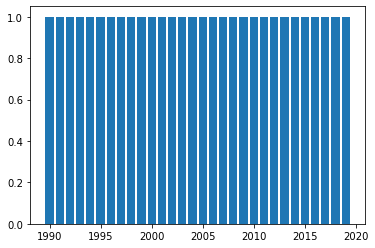

In [308]:
plt.bar(df['year'], df['protest'])

In [309]:
# changed 

df['outcome'] = df['stateresponse1'].apply(lambda x: 1 if x == 'accomodation' else int(0))

In [310]:
df['outcome'].value_counts()

0    15426
1      937
Name: outcome, dtype: int64

In [311]:
df['outcome'].value_counts( normalize = True)

0    0.942737
1    0.057263
Name: outcome, dtype: float64

In [312]:
# plt.scatter(df['stateresponse1'], df['protesterdemand1'])

In [313]:
# if statement for the 

In [314]:
df.groupby(['protesterviolence'])['stateresponse1'].value_counts(normalize = True)

protesterviolence  stateresponse1 
0.0                ignore             0.691335
                   crowd dispersal    0.141827
                   accomodation       0.076347
                   arrests            0.058454
                   shootings          0.015082
                   beatings           0.010023
                   killings           0.006932
1.0                crowd dispersal    0.550945
                   ignore             0.145483
                   arrests            0.111607
                   shootings          0.066702
                   beatings           0.050683
                   killings           0.042542
                   accomodation       0.032038
Name: stateresponse1, dtype: float64

In [315]:
df.groupby(['protesterviolence','region'])['stateresponse1'].value_counts(normalize = True)

protesterviolence  region           stateresponse1 
0.0                Africa           ignore             0.556549
                                    crowd dispersal    0.225145
                                    accomodation       0.110468
                                    arrests            0.055234
                                    shootings          0.029458
                                    beatings           0.013677
                                    killings           0.009469
                   Asia             ignore             0.670471
                                    crowd dispersal    0.129815
                                    accomodation       0.085592
                                    arrests            0.075131
                                    beatings           0.014265
                                    shootings          0.014265
                                    killings           0.010461
                   Central America  ignore          

### Data with no null dates

In [316]:
# created a second data frame based on 1 or more protest 
# alternative to deleting NaN dates 

df2 = df[df['protestnumber']>0].copy()

In [317]:
df2['startyear'] = df2['startyear'].astype(int)
df2['startmonth'] = df2['startmonth'].astype(int)
df2['startday'] = df2['startday'].astype(int)
df2['endyear'] = df2['endyear'].astype(int)
df2['endmonth'] = df2['endmonth'].astype(int)
df2['endday'] = df2['endday'].astype(int)


df2['startdate'] = df2.apply(lambda x: datetime.date(x['startyear'], x['startmonth'], x['startday']), axis = 1)

df2['enddate'] = df2.apply(lambda x: datetime.date(x['endyear'], x['endmonth'], x['endday']), axis = 1)

df2['startdate'] = pd.to_datetime(df2['startdate'])
df2['enddate'] = pd.to_datetime(df2['enddate'])

df2['datedelta'] = df2['enddate'] - df2['startdate']
df2['datedelta'] = df2['datedelta'].dt.days.astype(int)

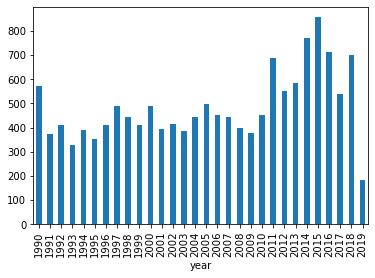

In [318]:
df2.groupby(['year'])['id'].count().sort_index().plot.bar()

### Protests counts per region

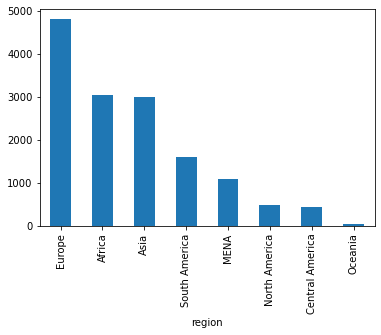

In [319]:
df2.groupby(['region'])['id'].count().sort_values(ascending = False).plot.bar()

### Protests by year by region

In [320]:
pd.crosstab(df2['region'], df2['year']).style.background_gradient(cmap = 'coolwarm')

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,82,98,84,85,84,55,67,98,81,63,83,83,76,67,93,123,84,64,73,71,137,145,164,128,71,275,200,118,166,25
Asia,117,51,63,40,66,49,76,96,110,108,127,89,76,76,108,125,156,128,131,82,71,157,111,134,223,134,89,68,107,19
Central America,6,8,12,15,13,28,16,18,15,12,21,19,16,22,21,21,11,7,9,14,5,13,10,15,4,44,7,4,27,4
Europe,287,132,153,128,119,147,164,188,144,128,155,92,146,144,122,126,123,146,83,110,155,152,155,180,266,229,254,224,287,72
MENA,12,15,19,9,18,6,11,9,11,9,16,19,18,15,16,40,21,23,30,46,30,182,71,73,130,62,40,36,66,43
North America,17,14,9,10,27,20,12,14,16,15,17,8,7,12,14,8,13,7,7,7,7,5,9,10,33,57,71,33,14,7
Oceania,3,2,0,1,0,1,1,2,1,0,2,5,0,0,2,5,0,0,0,1,2,1,3,1,1,0,1,3,0,0
South America,48,52,69,41,63,49,62,63,64,76,67,78,76,52,67,49,46,70,65,45,45,33,30,45,41,56,51,54,32,13


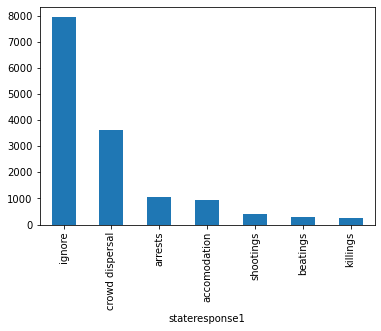

In [321]:
df2.groupby(['stateresponse1'])['id'].count().sort_values(ascending = False).plot.bar()

# Europe DataFrame

In [322]:
edf = df2[df2['region'] == 'Europe'].copy()

In [438]:
edf.shape

(4811, 37)

### Count of protest and response per row

In [323]:
edf['protestdemands'] = edf[['protesterdemand1','protesterdemand2','protesterdemand3','protesterdemand4']].count(axis = 1)
edf['stateresponses'] = edf[['stateresponse1','stateresponse2','stateresponse3','stateresponse4','stateresponse5','stateresponse6','stateresponse7']].count(axis = 1)



### Create bins of participants

In [324]:
edf['participants_category'].unique()

array(['100-999', '2000-4999', '>10000', '1000-1999', '5000-10000', nan,
       '50-99'], dtype=object)

In [325]:
def protestbins(i):
    if i < 50: return '>50'
    elif i <100: return '50-99'
    elif i <1000: return '100-999'
    elif i <2000: return '1000-1999'
    elif i <5000: return '2000-4999'
    elif i <10001: return'5000-10000'
    else: return '>10000'
    

In [326]:
protestbins(200000)

'>10000'

In [327]:
#edf['participants'].map(protestbins);

---

In [328]:
edf2 = edf.copy()

### Create categorical column for response & demand

In [329]:
stateresponse_codes = {'accomodation':1,'ignore':2,'arrests':3,'crowd dispersal':4,
                       'shootings':5,'beatings':6,'killings':7}
protesterdemand_codes = {'political behavior, process':1,
                         'labor wage dispute':2,
                         'price increases, tax policy':3,
                         'removal of politician':4,
                         'police brutality':5,'land farm issue':6,
                         'social restrictions':7}
#for col in edf2.columns:
#    if 'demand' in col:
#        edf2[col] = edf2[col].map(protesterdemand_codes)
#for col in edf.columns:
#    if 'response' in col:
#        edf2[col] = edf2[col].map(stateresponse_codes)

In [330]:
edf2['protesterdemand1.1']  = edf2['protesterdemand1'].map(protesterdemand_codes)
edf2['protesterdemand2.1']  = edf2['protesterdemand2'].map(protesterdemand_codes)
edf2['protesterdemand3.1']  = edf2['protesterdemand3'].map(protesterdemand_codes)
edf2['protesterdemand4.1']  = edf2['protesterdemand4'].map(protesterdemand_codes)

In [331]:
edf2['stateresponse1.1']  = edf2['stateresponse1'].map(stateresponse_codes)
edf2['stateresponse2.1']  = edf2['stateresponse2'].map(stateresponse_codes)
edf2['stateresponse3.1']  = edf2['stateresponse3'].map(stateresponse_codes)
edf2['stateresponse4.1']  = edf2['stateresponse4'].map(stateresponse_codes)
edf2['stateresponse5.1']  = edf2['stateresponse5'].map(stateresponse_codes)
edf2['stateresponse6.1']  = edf2['stateresponse6'].map(stateresponse_codes)
edf2['stateresponse7.1']  = edf2['stateresponse7'].map(stateresponse_codes)

In [338]:
edf3 = edf2.fillna(999);

### Baseline 

In [339]:
# for all responses

edf3['stateresponse1'].value_counts(normalize = True)

ignore             0.674496
crowd dispersal    0.207233
arrests            0.053004
accomodation       0.048639
beatings           0.010393
shootings          0.004365
killings           0.001247
999                0.000624
Name: stateresponse1, dtype: float64

In [341]:
# for accomodations vs all 

edf3['outcome'].value_counts(normalize = True)

0    0.951361
1    0.048639
Name: outcome, dtype: float64

In [424]:
edf3['outcome'].value_counts()

0    4577
1     234
Name: outcome, dtype: int64

In [340]:
edf3.columns

Index(['id', 'country', 'ccode', 'year', 'region', 'protest', 'protestnumber',
       'startday', 'startmonth', 'startyear', 'endday', 'endmonth', 'endyear',
       'protesterviolence', 'location', 'participants_category',
       'participants', 'protesteridentity', 'protesterdemand1',
       'protesterdemand2', 'protesterdemand3', 'protesterdemand4',
       'stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4',
       'stateresponse5', 'stateresponse6', 'stateresponse7', 'sources',
       'notes', 'outcome', 'startdate', 'enddate', 'datedelta',
       'protestdemands', 'stateresponses', 'protesterdemand1.1',
       'protesterdemand2.1', 'protesterdemand3.1', 'protesterdemand4.1',
       'stateresponse1.1', 'stateresponse2.1', 'stateresponse3.1',
       'stateresponse4.1', 'stateresponse5.1', 'stateresponse6.1',
       'stateresponse7.1'],
      dtype='object')

In [369]:
# columns to drop for X variables 

drop = ['id', 'startday', 'endday', 'participants_category', 'participants', 'protesteridentity', 'sources', 'notes','outcome', 
       'location', 'protesterdemand1',
       'protesterdemand2', 'protesterdemand3', 'protesterdemand4',
       'stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4',
       'stateresponse5', 'stateresponse6', 'stateresponse7','startdate', 'enddate']

In [370]:
# X features 

features = edf3.drop(columns = drop)

In [371]:
features;

### Dummy columns 

In [373]:
features.columns

Index(['country', 'ccode', 'year', 'region', 'protest', 'protestnumber',
       'startmonth', 'startyear', 'endmonth', 'endyear', 'protesterviolence',
       'datedelta', 'protestdemands', 'stateresponses', 'protesterdemand1.1',
       'protesterdemand2.1', 'protesterdemand3.1', 'protesterdemand4.1',
       'stateresponse1.1', 'stateresponse2.1', 'stateresponse3.1',
       'stateresponse4.1', 'stateresponse5.1', 'stateresponse6.1',
       'stateresponse7.1'],
      dtype='object')

In [442]:
dummy = ['country', 'ccode', 'year', 'region', 'startmonth','startyear','endmonth','endyear']

# remove ccode to align with group

In [443]:
features2 = pd.get_dummies(features, columns = dummy, drop_first = True);

### Variables - Binary

In [383]:
y = edf3['outcome']
X = features2

---

# Modeling

In [420]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, recall_score, precision_score

In [426]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100, stratify = y)

### Model Pipeline - Binary 

In [470]:
plr = Pipeline ([('ss', StandardScaler()),
         ('lr', LogisticRegression(max_iter = 5000))])

pknn = Pipeline ([('ss', StandardScaler()),
                     ('knn', KNeighborsClassifier())])

prf = Pipeline ([('ss', StandardScaler()),
                     ('rf', RandomForestClassifier())])

pdt = Pipeline ([('ss', StandardScaler()),
                     ('dt', DecisionTreeClassifier())])

pbg = Pipeline ([('ss', StandardScaler()),
                     ('bg', BaggingClassifier())])

pab = Pipeline ([('ss', StandardScaler()),
                     ('gb', AdaBoostClassifier())])

psv = Pipeline ([('ss', StandardScaler()),
                     ('svc', SVC())])


In [471]:
classification_models = [plr, pknn, prf, pdt, pbg, pab, psv]

In [429]:
for model in classification_models:
    model.fit(X_train, y_train)

### Model Pipeline Scoring 

In [430]:
# logistic regression

plr.score(X_train, y_train), plr.score(X_test, y_test)
    
    

(0.9528824833702882, 0.9517871986699917)

In [431]:
# Knn

pknn.score(X_train, y_train), pknn.score(X_test, y_test)

(0.9539911308203991, 0.9484621778886118)

In [432]:
# adaboost

pab.score(X_train, y_train), pab.score(X_test, y_test)

(1.0, 1.0)

In [433]:
# SVC 

psv.score(X_train, y_train), psv.score(X_test, y_test)

(0.9517738359201774, 0.9509559434746467)

In [523]:
# Binary confusion matrix 

In [434]:
preds_plr = plr.predict(X_test)

In [435]:
tn, fp, fn, tp = confusion_matrix(y_test, preds_plr).ravel()

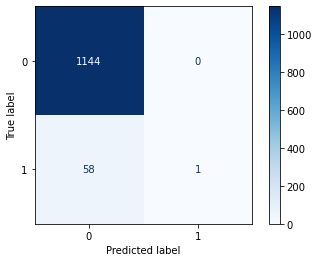

In [436]:
plot_confusion_matrix(plr, X_test, y_test, cmap='Blues', values_format='d');

### MultiClass Modeling 

In [425]:
X.head(4)

,protest,protestnumber,protesterviolence,datedelta,protestdemands,stateresponses,protesterdemand1.1,protesterdemand2.1,protesterdemand3.1,protesterdemand4.1,stateresponse1.1,stateresponse2.1,stateresponse3.1,stateresponse4.1,stateresponse5.1,stateresponse6.1,stateresponse7.1,country_Armenia,country_Austria,country_Azerbaijan,country_Belarus,country_Belgium,country_Bosnia,country_Bulgaria,country_Croatia,country_Cyprus,country_Czech Republic,country_Czechoslovakia,country_Denmark,country_Estonia,country_Finland,country_France,country_Georgia,country_Germany,country_Germany East,country_Germany West,country_Greece,country_Hungary,country_Ireland,country_Italy,country_Kosovo,country_Latvia,country_Lithuania,country_Luxembourg,country_Macedonia,country_Moldova,country_Montenegro,country_Netherlands,country_Norway,country_Poland,country_Portugal,country_Romania,country_Russia,country_Serbia,country_Serbia and Montenegro,country_Slovak Republic,country_Slovenia,country_Spain,country_Sweden,country_Switzerland,country_USSR,country_Ukraine,country_United Kingdom,country_Yugoslavia,ccode_205,ccode_210,ccode_211,ccode_212,ccode_220,ccode_225,ccode_230,ccode_235,ccode_255,ccode_260,ccode_265,ccode_290,ccode_305,ccode_310,ccode_315,ccode_316,ccode_317,ccode_325,ccode_339,ccode_341,ccode_342,ccode_343,ccode_344,ccode_345,ccode_346,ccode_347,ccode_348,ccode_349,ccode_350,ccode_352,ccode_355,ccode_359,ccode_360,ccode_364,ccode_365,ccode_366,ccode_367,ccode_368,ccode_369,ccode_370,ccode_371,ccode_372,ccode_373,ccode_375,ccode_380,ccode_385,ccode_390,year_1991,year_1992,year_1993,year_1994,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,startmonth_2,startmonth_3,startmonth_4,startmonth_5,startmonth_6,startmonth_7,startmonth_8,startmonth_9,startmonth_10,startmonth_11,startmonth_12,startyear_1991,startyear_1992,startyear_1993,startyear_1994,startyear_1995,startyear_1996,startyear_1997,startyear_1998,startyear_1999,startyear_2000,startyear_2001,startyear_2002,startyear_2003,startyear_2004,startyear_2005,startyear_2006,startyear_2007,startyear_2008,startyear_2009,startyear_2010,startyear_2011,startyear_2012,startyear_2013,startyear_2014,startyear_2015,startyear_2016,startyear_2017,startyear_2018,startyear_2019,endmonth_2,endmonth_3,endmonth_4,endmonth_5,endmonth_6,endmonth_7,endmonth_8,endmonth_9,endmonth_10,endmonth_11,endmonth_12,endyear_1991,endyear_1992,endyear_1993,endyear_1994,endyear_1995,endyear_1996,endyear_1997,endyear_1998,endyear_1999,endyear_2000,endyear_2001,endyear_2002,endyear_2003,endyear_2004,endyear_2005,endyear_2006,endyear_2007,endyear_2008,endyear_2009,endyear_2010,endyear_2011,endyear_2012,endyear_2013,endyear_2014,endyear_2015,endyear_2016,endyear_2017,endyear_2018,endyear_2019
2697,1,1,0.0,0,1,1,2,999.0,999.0,999.0,2.0,999.0,999.0,999.0,999.0,999.0,999.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2698,1,2,0.0,0,2,1,3,1.0,999.0,999.0,2.0,999.0,999.0,999.0,999.0,999.0,999.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2699,1,3,0.0,0,2,2,1,3.0,999.0,999.0,4.0,3.0,999.0,999.0,999.0,999.0,999.0,0,0,0,0,0,0,0,0,0,0,0,0,0

### Multi Class Variables

In [506]:
y2 = edf3['stateresponse1.1']

In [507]:
drop2 = ['id', 'startday', 'endday', 'participants_category', 'participants', 'protesteridentity', 'sources', 'notes', 
       'location', 'protesterdemand1',
       'protesterdemand2', 'protesterdemand3', 'protesterdemand4',
       'stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4',
       'stateresponse5', 'stateresponse6', 'stateresponse7','startdate', 'enddate','stateresponse1.1']

In [508]:
dummy2 = ['country', 'ccode', 'year', 'region', 'startmonth','startyear','endmonth','endyear']

In [510]:
featuresMC = edf3.drop(columns = drop2)

In [511]:
featuresMC = pd.get_dummies(featuresMC, columns = dummy2, drop_first = True);

In [512]:
X2 = featuresMC

In [514]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state = 100, stratify = y)

### Modeling - fitting models for multiclass

In [515]:
for model in classification_models:
    model.fit(X_train2, y_train2)

In [516]:
# Logistic Regression
plr.score(X_train2, y_train2), plr.score(X_test2, y_test2)
    

(0.8378603104212861, 0.830423940149626)

In [517]:
# knn
pknn.score(X_train2, y_train2), pknn.score(X_test2, y_test2)

(0.7649667405764967, 0.7090606816292602)

In [518]:
# sv 

psv.score(X_train2, y_train2), psv.score(X_test2, y_test2)

(0.8472838137472284, 0.8345802161263508)

In [519]:
# adaboost

pab.score(X_train2, y_train2), pab.score(X_test2, y_test2)

(0.8170731707317073, 0.8312551953449709)

In [525]:
# multiclass confusion matrix

In [521]:
pred = pab.predict(X_test2)

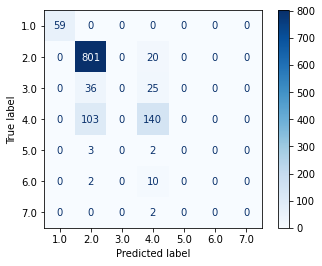

In [522]:
plot_confusion_matrix(pab, X_test2, y_test2, cmap='Blues', values_format='d');